In [2]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

### Pulling data from pickle file

In [3]:
nutrition = pd.read_pickle("./nutrition_data_clean.pkl")
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


### Removing nans from dataset

In [4]:
columns = list(nutrition.columns)
useful = columns[8:19]
# creating this list to drop NaNs because it can't be done directly in the .dropna function.
useful

['GHG(kgco2eq/100g)',
 'Water use (L/100g)',
 'Acidifying emissions(kgSO2eq/100g)',
 'Eutr emissions  (kg PO43-eq per 100g)',
 'Calories',
 'Fat (g)',
 'Protein (g)',
 'Carbohydrate (g)',
 'Sugars (g)',
 'Fiber (g)',
 'Cholesterol (mg)']

### Removing NaN only in the columns labelled "useful" in cell above

In [5]:
nutrition = nutrition.dropna(subset=useful)
nutrition

,name,Food Group,Branded?,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,Pillsbury Cinnamon Rolls With Icing Refrigerat...,Baked Foods,NaN,1.70,260.0,0.653846,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,Waffle Buttermilk Frozen Ready-To-Heat Microwaved,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,Waffle Plain Frozen Ready-To-Heat Microwave,Baked Foods,X,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,NaN,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,Romaine Lettuce Raw,Vegetables,NaN,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,Palak Paneer,Vegetables,NaN,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,Carrots Raw Salad,Vegetables,NaN,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


### Extracting the nutrition data as the features, labelled X

In [6]:
X = nutrition.iloc[:,10:]
X

,Acidifying emissions(kgSO2eq/100g),Eutr emissions (kg PO43-eq per 100g),Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Cholesterol (mg),Saturated Fats (g)
0,0.001209,0.000706,330,11.27,4.34,53.42,21.34,1.4,0.0,3.250
1,0.001209,0.000706,273,9.22,6.58,41.05,4.30,2.2,15.0,1.898
2,0.001209,0.000706,309,9.49,7.42,48.39,4.41,2.6,13.0,2.275
3,0.001209,0.000706,289,9.40,6.92,44.16,4.50,2.4,16.0,2.057
4,0.001209,0.000706,298,9.91,6.71,45.41,5.04,2.4,16.0,1.580
...,...,...,...,...,...,...,...,...,...,...
1218,0.000531,0.000186,241,10.16,1.66,40.60,19.10,2.9,0.0,1.507
1219,0.000531,0.000186,19,0.27,1.39,3.78,0.71,3.1,0.0,0.053
1220,0.014894,0.008875,96,6.84,5.23,4.32,1.89,1.2,7.0,1.486
1221,0.000531,0.000186,208,15.70,1.22,17.17,11.23,2.3,9.0,2.452


### Extracting the GHG emissions, as the labels, y

In [7]:
y = nutrition.iloc[:,8]
y

0       0.1441
1       0.1441
2       0.1441
3       0.1441
4       0.1441
         ...  
1218    0.0455
1219    0.0455
1220    2.1240
1221    0.0455
1222    0.0455
Name: GHG(kgco2eq/100g), Length: 1189, dtype: float64

### Test train splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
# size is the size of the test dataset. size=0.2 means 80:20 test:train split

#### adding a Validation set: X_val, y_val

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3)

In [10]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(X_train) 
X_train = scaler.transform(X_train)  
# apply same transformation to test and validation datasets
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test) 
print('Size of train dataset:', len(X_train), '-->', ("{:.3%}".format((len(X_train)/len(X)))), 'of whole dataset')
print('Size of validation dataset:', len(X_val), '-->', ("{:.3%}".format((len(X_val)/len(X)))), 'of whole dataset')
print('Size of test dataset:', len(X_test), '-->', ("{:.3%}".format((len(X_test)/len(X)))), 'of whole dataset')


Size of train dataset: 665 --> 55.929% of whole dataset
Size of validation dataset: 286 --> 24.054% of whole dataset
Size of test dataset: 238 --> 20.017% of whole dataset


# Implementing the MLPRegressor from SKLearn

In [11]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(solver='adam', random_state=42, max_iter=1000).fit(X_train, y_train)

In [12]:
y_pred = regr.predict(X_test)
score = regr.score(X_test, y_test)
print('The score was', score)
#print(regr.get_params())

The score was 0.977156490338156


### Metrics

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error

print('Mean of target dataset =', np.mean(y))
print('St dev of target dataset =', np.std(y))
 
print('Mean sq err =', mean_squared_error(y_test, y_pred))
print('Mean abs err =', mean_absolute_error(y_test, y_pred))
print('Med abs err =', median_absolute_error(y_test, y_pred))
#print('Med abs % err =', mean_absolute_percentage_error(y_test, y_pred))
#print('Standard dev =', np.std(y_test, y_pred))

Mean of target dataset = 0.8852883936080681
St dev of target dataset = 1.6666537807178798
Mean sq err = 0.07579242562342788
Mean abs err = 0.12782709624896565
Med abs err = 0.0481609034660019


In [13]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

cv_results = cross_validate(regr, X, y, cv=3)
cv_results

{'fit_time': array([1.30660605, 1.21285009, 1.73826909]),
 'score_time': array([0.00373721, 0.00539804, 0.01258779]),
 'test_score': array([-4.62970478, -2.04382796,  0.33681452])}

NameError: name 'Mean_Absolute_Error' is not defined

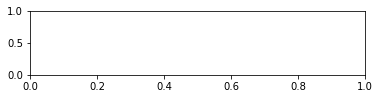

In [16]:
# plotting the different metrics to see the effect of changing the number of trees
import matplotlib.pyplot as plt
n_trees = list(range(1, 200, 5))

f = plt.figure(1)

plt.subplot(311)
plt.plot(n_trees, Mean_Absolute_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(312)
plt.plot(n_trees, Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()
plt.subplot(313)
plt.plot(n_trees, Root_Mean_Squared_Error)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Number of Trees')
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [19]:
print(__doc__)

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    
    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Automatically created module for IPython interactive environment


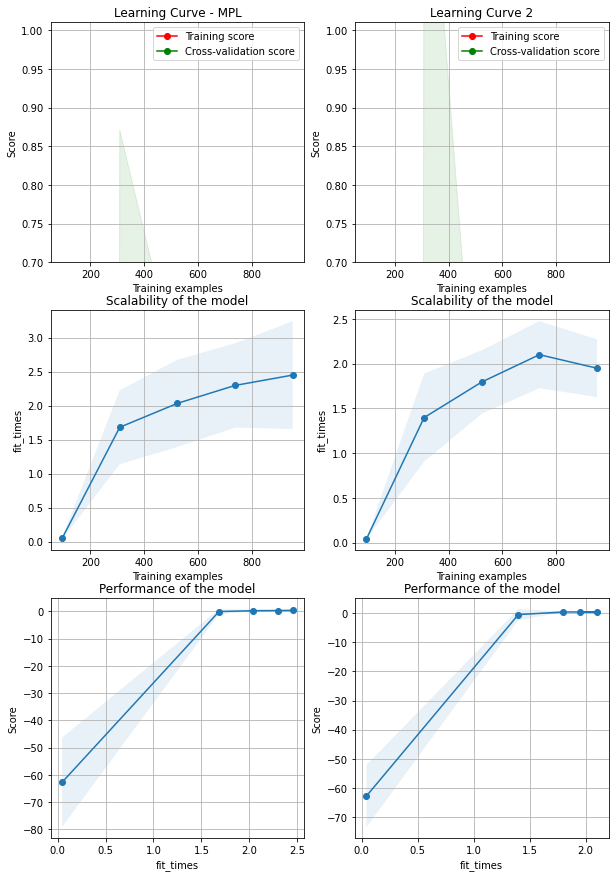

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

#X, y = load_digits(return_X_y=True)

title = "Learning Curve - MPL"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

regr = MLPRegressor(solver='adam', random_state=42, max_iter=1000).fit(X_train, y_train)
estimator = regr

plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = "Learning Curve 2"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = MLPRegressor(solver='adam', random_state=42, max_iter=1000).fit(X_train, y_train)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

# Learning and validation curves

In [17]:
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC
#from sklearn.datasets import load_digits
from skopt import BayesSearchCV 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

IndexError: tuple index out of range

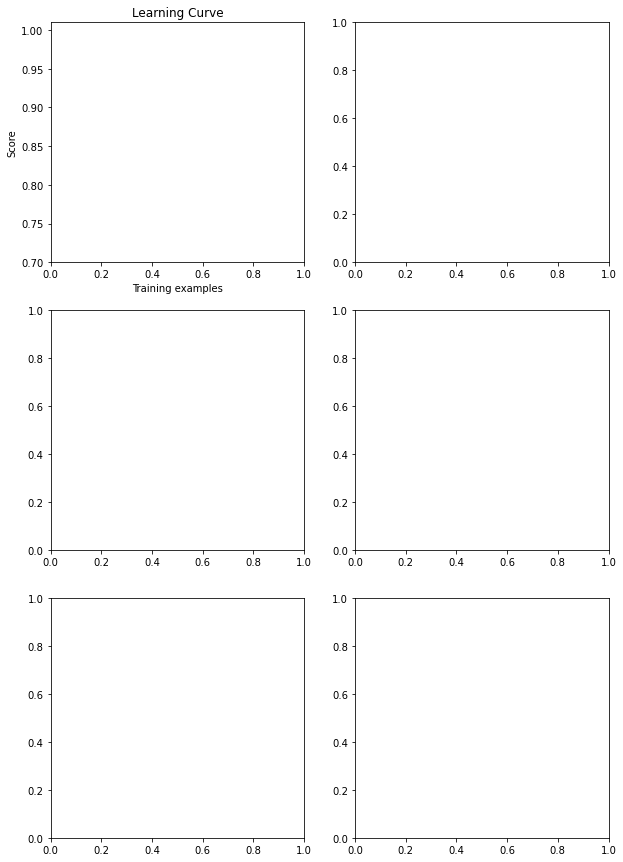

In [18]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=len(X_train)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, 
                                                                          train_sizes=train_sizes, return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)    

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


fig, axes = plt.subplots(3, 2, figsize=(10, 15))

X, y = (X_train, y_train)

title = "Learning Curve"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = regr
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01))

title = r"Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                    n_jobs=4)

plt.show()